<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/Diabetes_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introduction
**Purpose:**  
* diabetes sample data set에서 'outcome' label을 삭제하고, 'BMI'를 label로 설정해서 __regression analysis__를 진행한다.  

**New library**  
1. `import seaborn as sns`  
    **Seaborn** is a **Python data visualization library based on Matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is particularly useful for creating complex visualizations with less code and more visually appealing designs compared to Matplotlib alone.
2. `from sklearn.metrics import mean_squared_error`  
    

## 0. 1. Load the dataset and set the BMI as the new label

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for hitmap drawing
from sklearn.model_selection import train_test_split

In [58]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [59]:
'''
| Pregnancies               | 임신 횟수
| Glucose                   | 글루코스
| BloodPressure             | 혈압
| SkinThickness             | 삼두근 부위 피부 두께
| Insulin                   | 인슐린 수치
| BMI                       | BMI 수치
| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수
| Age                       | 나이
'''

'\n| Pregnancies               | 임신 횟수\n| Glucose                   | 글루코스\n| BloodPressure             | 혈압\n| SkinThickness             | 삼두근 부위 피부 두께\n| Insulin                   | 인슐린 수치\n| BMI                       | BMI 수치\n| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수\n| Age                       | 나이\n'

In [60]:
# drop the 'Outcome' and hitmap 보기 편하게 'BMI'를 마지막 column으로 이동
temp_BMI = diabetes['BMI']
diabetes = diabetes.drop(['Outcome', 'BMI'], axis=1)
# 마지막 column index 확인용
diabetes.shape

(768, 7)

In [61]:
# 기존 column index is 0 ~ 6
diabetes.insert(7, 'BMI', temp_BMI)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,BMI
0,6,148,72,35,0,0.627,50,33.6
1,1,85,66,29,0,0.351,31,26.6
2,8,183,64,0,0,0.672,32,23.3
3,1,89,66,23,94,0.167,21,28.1
4,0,137,40,35,168,2.288,33,43.1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63,32.9
764,2,122,70,27,0,0.340,27,36.8
765,5,121,72,23,112,0.245,30,26.2
766,1,126,60,0,0,0.349,47,30.1


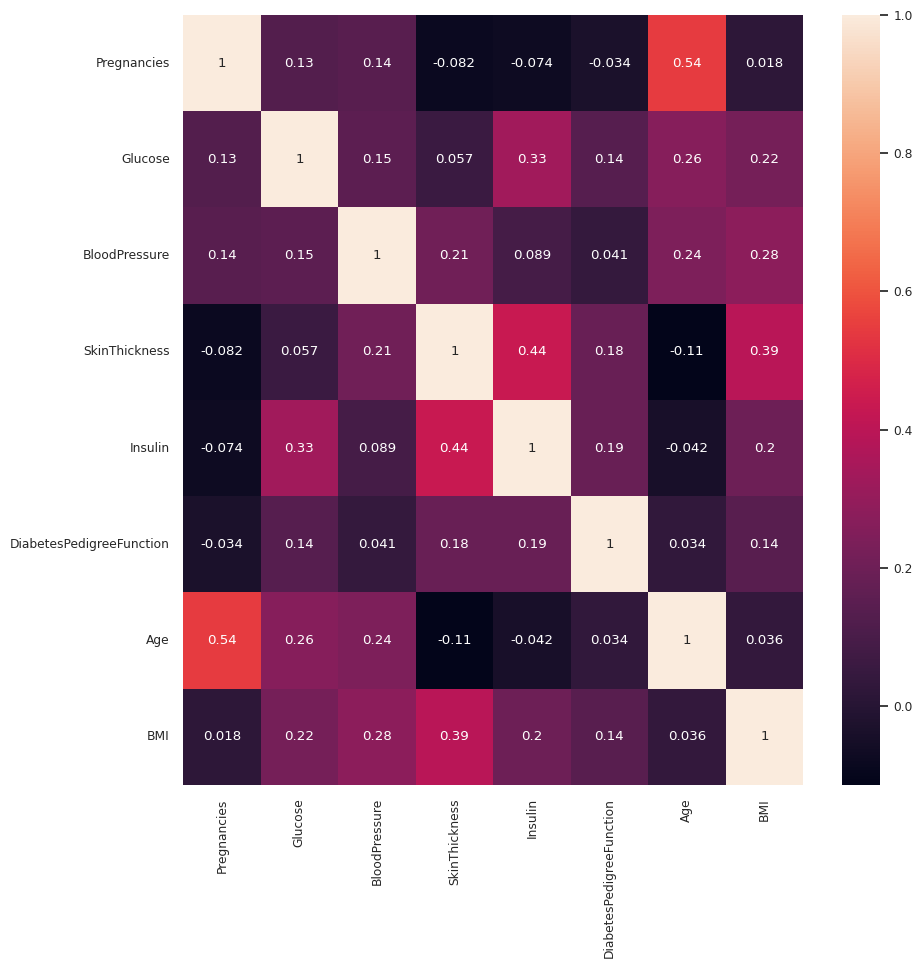

In [62]:
# correlation matrix
# if corr >= 0.3, correlated and if corr >= 0.7, high correlated

diabetes_corr = diabetes.corr()

# hitmap ploting by Seaborn library
# The 'annot' parameter is used to add annotations to the cells of a heatmap.
# The 'cbar' parameter controls the display of the color bar(position=right) in plots like heatmaps.
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(diabetes_corr, annot=True, cbar=True)
plt.show()

# the label(BMI) is correlated with SkinThickness

In [63]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   BMI                       768 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [64]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,0.471876,33.240885,31.992578
std,3.369578,31.972618,19.355807,15.952218,115.244002,0.331329,11.760232,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,0.243750,24.000000,27.300000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,0.372500,29.000000,32.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,0.626250,41.000000,36.600000
max,17.000000,199.000000,122.000000,99.000000,846.000000,2.420000,81.000000,67.100000


In [65]:
X = diabetes.drop('BMI', axis=1).to_numpy()
y = diabetes['BMI'].to_numpy()

In [66]:
from sklearn.model_selection import train_test_split

# regression이기 때문에 stratify parameter 사용 x
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 7) (614,)
(154, 7) (154,)


# 1. Linear regreesion

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
ly_preds = lr_model.predict(X_test) # linear y predicts

# sol1 - how to get the MSE
print('sol1. mean squared error', mean_squared_error(ly_preds, y_test))

# sol2 - how to get the MSE
def mse_np(predicted, actual):
    return np.mean((np.array(predicted) - np.array(actual)) ** 2)

print('sol2. mean squared error', mean_squared_error(ly_preds, y_test))

# sol3 - how to get the MSE
def mse(predicted, actual):
    sum_squared_error = sum((p - a) ** 2 for p, a in zip(predicted, actual))
    mean_squared_error = sum_squared_error / len(actual)
    return mean_squared_error

print('sol3. mean squared error', mse(ly_preds, y_test))

sol1. mean squared error 52.24058284874794
sol2. mean squared error 52.24058284874794
sol3. mean squared error 52.240582848747934


In [68]:
# 'SkinThickness'의 index = 3
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   BMI                       768 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [69]:
print(X_test.shape)
print(X_test)
print(X_test[1][1])
print(X_test[:, 1])
print([X_test[:, 1]])

(154, 7)
[[6.00e+00 9.80e+01 5.80e+01 ... 1.90e+02 4.30e-01 4.30e+01]
 [2.00e+00 1.12e+02 7.50e+01 ... 0.00e+00 1.48e-01 2.10e+01]
 [2.00e+00 1.08e+02 6.40e+01 ... 0.00e+00 1.58e-01 2.10e+01]
 ...
 [8.00e+00 9.50e+01 7.20e+01 ... 0.00e+00 4.85e-01 5.70e+01]
 [2.00e+00 1.46e+02 7.00e+01 ... 3.60e+02 3.37e-01 2.90e+01]
 [8.00e+00 7.40e+01 7.00e+01 ... 4.90e+01 7.05e-01 3.90e+01]]
112.0
[ 98. 112. 108. 107. 136. 103.  71. 117. 154. 147. 111. 179. 148.  96.
  88. 125.  84.  86. 183. 140. 104.  88. 106.  96. 129. 184. 109. 100.
 102.  89. 162. 146. 184. 167. 109. 152. 197. 109. 121. 131.  85. 135.
 109. 104.  92. 158. 111.  95. 112. 173.  94. 145. 140. 134. 139.  74.
 158.  80. 121. 168. 154. 122. 129.  92.  84. 147.  81. 137. 104. 172.
 150.  83.  91.  95. 103. 103. 105.  96. 117. 110. 159. 104.  75. 135.
 119. 187. 152. 124.  99.  87.  93.  92.  74. 120. 123. 144. 106.  83.
 177.  62. 164.  78. 126. 146. 158. 112. 141. 173.  80. 109.  97. 175.
 105. 167. 112. 124. 162. 110.  91. 115. 105.

In [70]:
print(X_test[:, 1].shape)
print(y_test.shape)

(154,)
(154,)


ValueError: x and y must be the same size

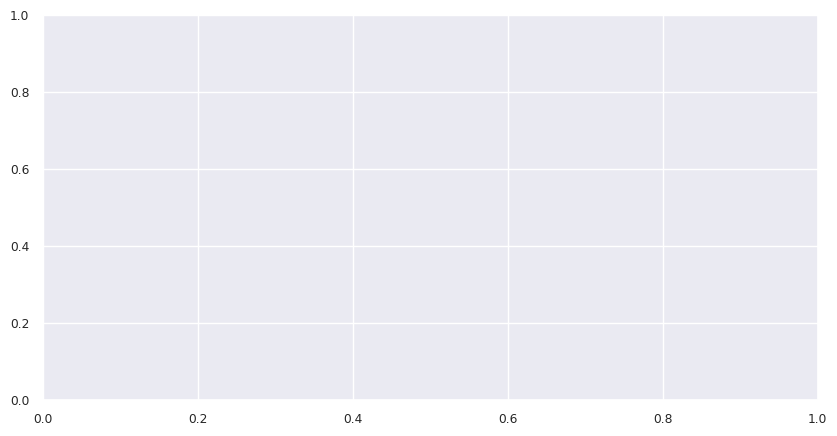

In [71]:
# @title ValueError: x and y must be the same size
# label('BMI')과 correlation 높은 feature는 'SkinThickness'
# label과 feature의 relation을 actual과 predicted로 나누어 scatter plotting

plt.figure(figsize=(10, 5))
plt.scatter(X_test[3], y_test, label='actual')
plt.scatter(X_test[3], ly_preds, label='predicted')
plt.show()

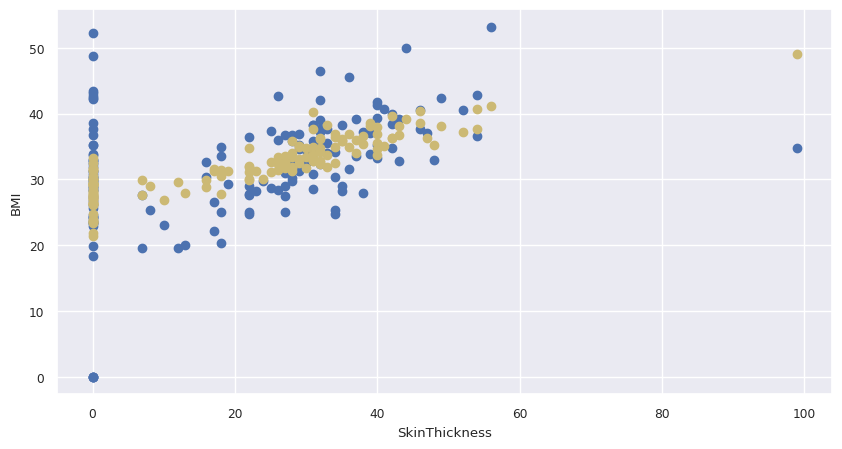

In [72]:
# label('BMI')과 correlation 높은 feature는 'SkinThickness'
# label과 feature의 relation을 actual과 predicted로 나누어 scatter plotting

plt.figure(figsize=(10, 5))
# numpy문법, 모든 row에 대하여 column index 3의 element만 추출
plt.scatter(X_test[:, 3], y_test, label='actual')
plt.scatter(X_test[:, 3], ly_preds, c='y', label='predicted')
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.show()

(위 cell)  
scatter plot을 봤을 때, 눈에 띄는 부분은 다음과 같다.  
1. **SkinThickness = 0**인 data instances가 꽤나 존재한다.
2. 대부분의 SkinThickness value는 60 미만이지만, **100에 가까운 outliar**가 한 개 존재한다.

(다음 cell)  
'SkinThickness'가 0인 datainstance가 무려 227개나 존재한다.  
내 생각에는 **missing value를 0으로 처리**한 것 같은데, 원본 데이터 github에는 따로 설명이 되어있지 않아서 'SkinThickness'에 대한 자료를 구글링하겠다.

In [73]:
skin_thickness = diabetes[['SkinThickness']]
# sort=True(default)이면 count 수로 정렬, False이면 value로 정렬
skin_thickness.value_counts(sort=False)

SkinThickness
0                227
7                  2
8                  2
10                 5
11                 6
12                 7
13                11
14                 6
15                14
16                 6
17                14
18                20
19                18
20                13
21                10
22                16
23                22
24                12
25                16
26                16
27                23
28                20
29                17
30                27
31                19
32                31
33                20
34                 8
35                15
36                14
37                16
38                 7
39                18
40                16
41                15
42                11
43                 6
44                 5
45                 6
46                 8
47                 4
48                 4
49                 3
50                 3
51                 1
52                 2
54                 2

# 2. Decision Tree

In [74]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [75]:
from sklearn.metrics import mean_squared_error

dy_preds = dt_model.predict(X_test)
print('Mean Sqaured Error', mean_squared_error(dy_preds, y_test))

Mean Sqaured Error 104.12746753246752


(위 cell)  
MSE가 오히려 커져버렸다.

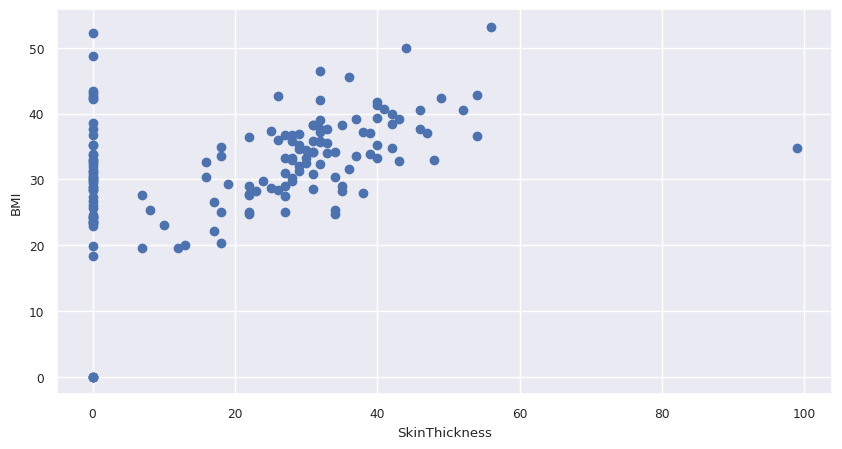

In [81]:
# actual에 BMI가 missing value인 경우도 존재
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 3], y_test, label='actual')
# plt.scatter(X_test[:, 3], dy_preds, c='y', label='predicted')
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.show()